In [1]:
# import main libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# data provided in tuble of training and test datasets 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [3]:
print(f"- The shape of the training dataset is: {train_data.shape}")
print(f"- The shape of the single data in the training datase is: {train_data[0].shape}")
print(f"- There are {train_data.shape[0]} number of images in the training data")
print(f"- Each image has {train_data[0].shape[0]} x {train_data[0].shape[1]} pixels")
print(f"- The dimensions of the single data in the training dataset is {train_data[0].ndim}")


- The shape of the training dataset is: (60000, 28, 28)
- The shape of the single data in the training datase is: (28, 28)
- There are 60000 number of images in the training data
- Each image has 28 x 28 pixels
- The dimensions of the single data in the training dataset is 2


In [4]:
#Explore data set
print(f"Training sample:\n {train_data[0]}\n")
print(f"Test sample:\n {train_labels[0]}\n")


Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [5]:
# create list of label names

label_names = ["T-shirt/top","Trouser","Pullover",
               "Dress","Coat","Sandal","Shirt",
               "Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'Label: 7 --> Sneaker')

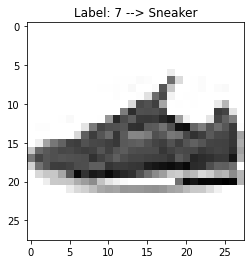

In [6]:
#plot a single sample with label in title
import random
sample_num = random.randint(0, len(train_data))
plt.imshow(train_data[sample_num], cmap=plt.cm.binary)
plt.title(f"Label: {train_labels[sample_num]} --> {label_names[train_labels[sample_num]]}")


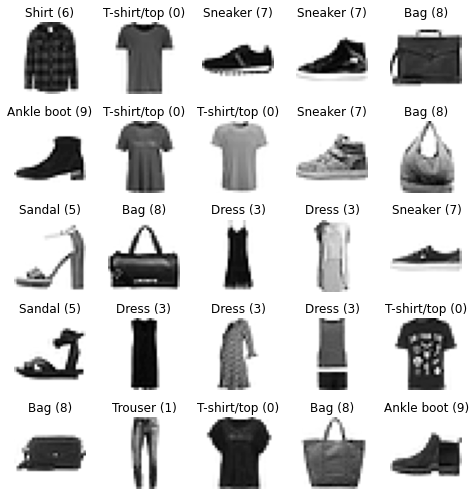

In [7]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(7,7))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
    plt.title(f"{label_names[train_labels[rand_index]]} ({train_labels[rand_index]})")
    plt.axis(False)
    plt.tight_layout()
    
 

In [8]:
# set input shape 
input_shape = train_data[0].shape
input_shape

(28, 28)

In [9]:
output_shape = train_labels[0].shape
output_shape


()

In [10]:
# Build architecture

#set random seed

tf.random.set_seed(42)

#1. Build model
model = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')

])


#2. Compile model

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#3. Fit model

non_norm_history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data,test_labels),
    verbose = 2)


Epoch 1/10
1875/1875 - 3s - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 - 4s - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 - 4s - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 - 3s - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 - 4s - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 - 4s - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 - 4s - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - val_accuracy: 0.3608
Epoch 8/10
1875/1875 - 4s - loss: 1.5027 - accuracy: 0.3593 - val_loss: 1.4784 - val_accuracy: 0.3625
Epoch 9/10
1875/1875 - 4s - loss: 1.4604 - accuracy: 0.3834 - val_loss: 1.3520 - val_accuracy: 0.4335
Epoch 10/10
1875/1875 - 3s - loss: 1.4344 - accuracy: 0.3945 - val_loss: 1.3387 - 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


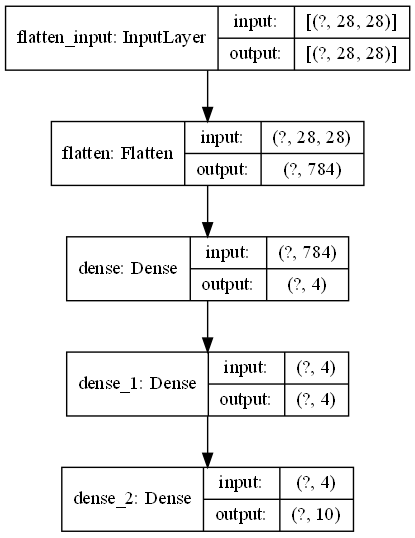

In [12]:
tf.keras.utils.plot_model(model,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100)


In [19]:
non_norm_df = pd.DataFrame(non_norm_history.history)
non_norm_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.159503,0.162967,1.812142,0.2138
1,1.700120,0.253017,1.649686,0.2853
2,1.625219,0.284267,1.602649,0.2916
3,1.601571,0.290250,1.592873,0.3068
4,1.582888,0.303017,1.575420,0.3154


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

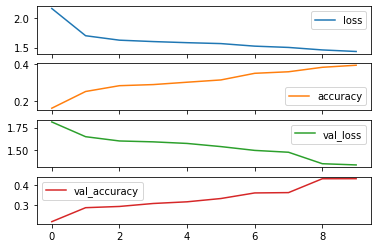

In [21]:
non_norm_df.plot(subplots = True)

In [14]:
train_data.min(), train_data.max()

(0, 255)

In [15]:
#scale/normalize data

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), test_data_norm.max()


(0.0, 1.0)

In [17]:
# Create model 2 for normalized/scaled data (number between 0 and 1)

#1. Create model

#set random seed
tf.random.set_seed(42)

#1. Build model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),

])

#2 Compile model

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

#3 Fit model

norm_history = model_2.fit(train_data_norm,
            train_labels,
            epochs = 10,
            verbose=2,
            validation_data=(test_data_norm,test_labels),
)


Epoch 1/10
1875/1875 - 4s - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 - 4s - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 - 4s - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 - 4s - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 - 4s - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 - 3s - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 - 3s - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epoch 8/10
1875/1875 - 4s - loss: 0.5428 - accuracy: 0.8077 - val_loss: 0.5787 - val_accuracy: 0.7971
Epoch 9/10
1875/1875 - 3s - loss: 0.5373 - accuracy: 0.8097 - val_loss: 0.5698 - val_accuracy: 0.7977
Epoch 10/10
1875/1875 - 4s - loss: 0.5360 - accuracy: 0.8124 - val_loss: 0.5658 - 

In [22]:
norm_df = pd.DataFrame(norm_history.history)
norm_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.034784,0.647433,0.693734,0.7617
1,0.637599,0.775667,0.640015,0.7820
2,0.594212,0.791383,0.624713,0.7783
3,0.574958,0.797917,0.607760,0.7881
4,0.564112,0.800600,0.616884,0.7881


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

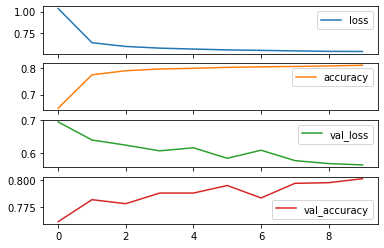

In [23]:
norm_df.plot(subplots = True)

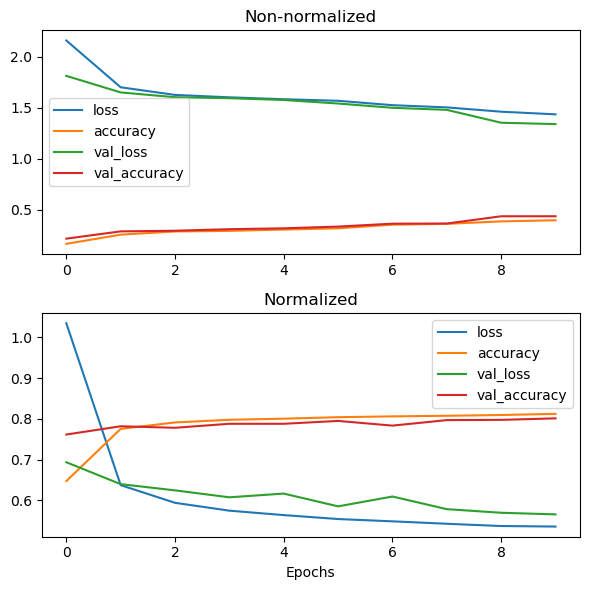

In [25]:
fig, ax = plt.subplots(2,1,figsize=(6,6),dpi=100)
non_norm_df.plot(title = 'Non-normalized',ax=ax[0])
norm_df.plot(title = 'Normalized',ax = ax[1])
ax[1].set_xlabel('Epochs')

plt.tight_layout()
plt.show()

In [64]:
# Find the optimal learning rate -learning rate losses decrease the most
#1. Create model with optimal learning rate

model_2_opt = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_2_opt.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

#leaarning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#3. Fit model

norm_history_opt = model_2_opt.fit(
    x=train_data_norm,
    y=train_labels,
    epochs=40,
    verbose=2,
    callbacks=[lr_scheduler],
    validation_data=(test_data,test_labels),
    )
    


Epoch 1/40
1875/1875 - 4s - loss: 1.1766 - accuracy: 0.5501 - val_loss: 120.5846 - val_accuracy: 0.5326
Epoch 2/40
1875/1875 - 4s - loss: 0.7374 - accuracy: 0.7366 - val_loss: 164.0379 - val_accuracy: 0.5908
Epoch 3/40
1875/1875 - 3s - loss: 0.6592 - accuracy: 0.7686 - val_loss: 157.1824 - val_accuracy: 0.6261
Epoch 4/40
1875/1875 - 3s - loss: 0.6237 - accuracy: 0.7856 - val_loss: 180.4295 - val_accuracy: 0.6283
Epoch 5/40
1875/1875 - 4s - loss: 0.6055 - accuracy: 0.7901 - val_loss: 166.7907 - val_accuracy: 0.6370
Epoch 6/40
1875/1875 - 3s - loss: 0.5966 - accuracy: 0.7936 - val_loss: 190.3822 - val_accuracy: 0.6088
Epoch 7/40
1875/1875 - 3s - loss: 0.5913 - accuracy: 0.7948 - val_loss: 190.9138 - val_accuracy: 0.6147
Epoch 8/40
1875/1875 - 3s - loss: 0.5849 - accuracy: 0.7981 - val_loss: 185.6376 - val_accuracy: 0.6143
Epoch 9/40
1875/1875 - 3s - loss: 0.5841 - accuracy: 0.7975 - val_loss: 183.0359 - val_accuracy: 0.6158
Epoch 10/40
1875/1875 - 3s - loss: 0.5870 - accuracy: 0.7962 - v

In [65]:
norm_df_opt = pd.DataFrame(norm_history_opt.history)
norm_df_opt.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.176608,0.550100,120.584648,0.5326,0.001000
1,0.737410,0.736617,164.037918,0.5908,0.001122
2,0.659223,0.768567,157.182373,0.6261,0.001259
3,0.623745,0.785617,180.429489,0.6283,0.001413
4,0.605508,0.790083,166.790741,0.6370,0.001585


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

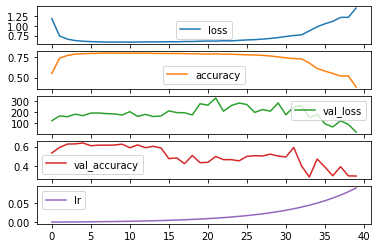

In [66]:
norm_df_opt.plot(subplots = True)

In [67]:
norm_df_opt.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'], dtype='object')

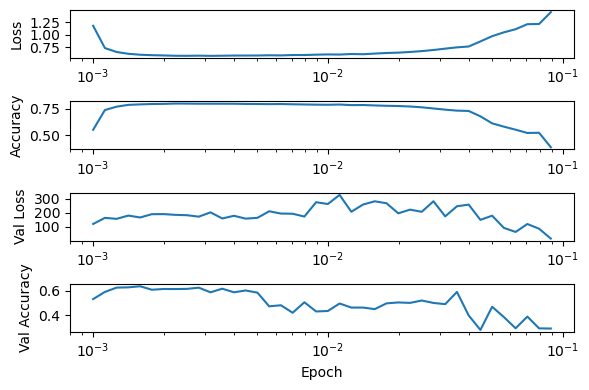

In [68]:
# Plot the learning rate decay curve
lrs = 1e-3 * 10**(tf.range(40)/20)
fig, ax = plt.subplots(4,1,dpi=100,tight_layout=True)
ax[0].semilogx(lrs,norm_df_opt['loss'])
ax[0].set_ylabel('Loss')

ax[1].semilogx(lrs,norm_df_opt['accuracy'])
ax[1].set_ylabel('Accuracy')

ax[2].semilogx(lrs,norm_df_opt['val_loss'])
ax[2].set_ylabel('Val Loss')

ax[3].semilogx(lrs,norm_df_opt['val_accuracy'])
ax[3].set_ylabel('Val Accuracy')

ax[3].set_xlabel('Epoch')

#ax.semilogx(lrs,norm_df_opt['loss'])
#plt.semilogx(lrs,norm_df_opt['accuracy'])
#plt.semilogx(lrs,norm_df_opt['val_loss'])
#plt.semilogx(lrs,norm_df_opt['val_accuracy'])

plt.show()


In [208]:
# fit model with ideal learning rate

# set random seed
tf.random.set_seed(42)
# 1. Create model
model_2_ideal = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(40, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#Compile model
model_2_ideal.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

# 3. Fit model
#set early stop callback
epoch_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=5)


norm_history_ideal = model_2_ideal.fit(
    x=train_data_norm,
    y=train_labels,
    epochs=50,
    verbose=2,
    validation_data=(test_data_norm,test_labels),
    callbacks=[epoch_callback]
)



Epoch 1/50
1875/1875 - 3s - loss: 0.5719 - accuracy: 0.7976 - val_loss: 0.4618 - val_accuracy: 0.8351
Epoch 2/50
1875/1875 - 5s - loss: 0.4041 - accuracy: 0.8541 - val_loss: 0.4743 - val_accuracy: 0.8364
Epoch 3/50
1875/1875 - 5s - loss: 0.3670 - accuracy: 0.8649 - val_loss: 0.4241 - val_accuracy: 0.8452
Epoch 4/50
1875/1875 - 5s - loss: 0.3446 - accuracy: 0.8735 - val_loss: 0.3919 - val_accuracy: 0.8579
Epoch 5/50
1875/1875 - 4s - loss: 0.3291 - accuracy: 0.8781 - val_loss: 0.3848 - val_accuracy: 0.8594
Epoch 6/50
1875/1875 - 3s - loss: 0.3171 - accuracy: 0.8835 - val_loss: 0.3808 - val_accuracy: 0.8583
Epoch 7/50
1875/1875 - 5s - loss: 0.3064 - accuracy: 0.8870 - val_loss: 0.3750 - val_accuracy: 0.8649
Epoch 8/50
1875/1875 - 5s - loss: 0.2974 - accuracy: 0.8897 - val_loss: 0.3493 - val_accuracy: 0.8738
Epoch 9/50
1875/1875 - 5s - loss: 0.2882 - accuracy: 0.8924 - val_loss: 0.3520 - val_accuracy: 0.8771
Epoch 10/50
1875/1875 - 6s - loss: 0.2840 - accuracy: 0.8942 - val_loss: 0.3654 - 

In [209]:
model_2_ideal.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_51 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_52 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_53 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_54 (Dense)             (None, 10)                210       
Total params: 35,100
Trainable params: 35,100
Non-trainable params: 0
_________________________________________________

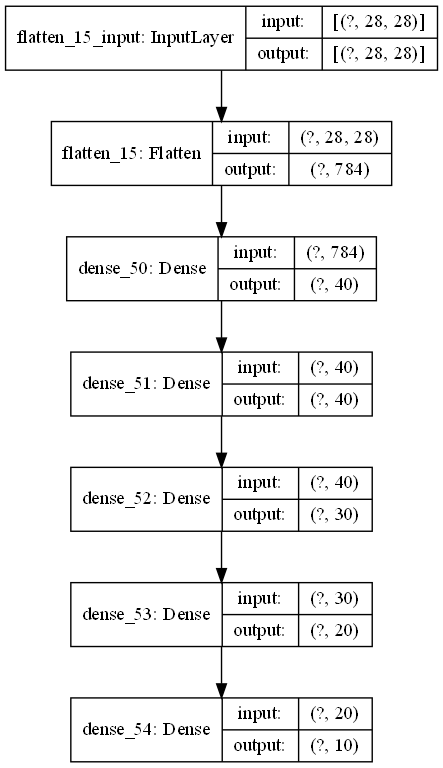

In [210]:
tf.keras.utils.plot_model(model_2_ideal,
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=100)


In [211]:
#list layers
model_2_ideal.layers

In [212]:
# Visualise weights and biase in each layer

weights, biases = model_2_ideal.layers[1].get_weights()

print(f"The weights are: \n \n {weights}")
print("\n")
print(f"The weights' shape is: \n {weights.shape}")
print(f"The biases are: \n \n {biases}")
print("\n")
print(f"The biases' shape is: \n {biases.shape}")

The weights are: 
 
 [[ 0.7495126  -0.6218077  -0.02510767 ...  1.130941    0.31129915
   0.37961933]
 [-0.99444157  1.0800798   0.06281351 ... -0.04768234  1.1282643
   1.1790786 ]
 [-0.8204794   0.8848461   0.15291509 ...  0.80384755  0.59409636
  -0.85048336]
 ...
 [ 0.38190994  0.8490767   0.19141649 ...  0.26787105 -0.7037191
  -1.1399397 ]
 [ 0.2251328   0.7901495   0.35631645 ...  0.10996198 -0.9431216
  -0.84193164]
 [-0.11707663  1.7693993  -0.22657667 ...  0.71331084 -0.79472375
  -1.3314624 ]]


The weights' shape is: 
 (784, 40)
The biases are: 
 
 [-0.16011478  0.7783177   0.05795683  0.5905195  -0.19250254  0.55569416
 -0.02711699 -0.15326937 -1.3312278   0.34388787  0.1299354  -0.02777242
 -0.46772286  0.19220385 -0.04041578  0.80130535  0.42024273  0.03635477
  0.23359786  0.6083146   0.16245903 -0.40744627 -0.02054566 -0.2953706
  0.11112219 -0.19949016  0.06723806  0.8934414   0.03518021  0.6937935
 -0.39028662 -0.02515795  0.43004087 -0.36748695 -0.02197977  0.679773

In [213]:
norm_history_ideal_df = pd.DataFrame(norm_history_ideal.history)
norm_history_ideal_df.head()


,loss,accuracy,val_loss,val_accuracy
0,0.571921,0.797633,0.461832,0.8351
1,0.404139,0.854133,0.474330,0.8364
2,0.366975,0.864933,0.424102,0.8452
3,0.344591,0.873500,0.391857,0.8579
4,0.329144,0.878067,0.384848,0.8594


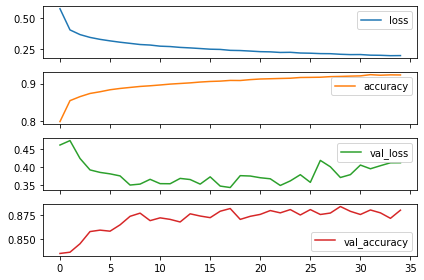

In [214]:
norm_history_ideal_df.plot(subplots = True)
plt.tight_layout()



In [215]:
# predictions in terms of probabilities for different labels
y_preds = model_2_ideal.predict(test_data_norm)
y_preds

array([[1.2638053e-10, 3.1952683e-17, 6.1998440e-10, ..., 1.5099506e-03,
        1.1044814e-12, 9.9848819e-01],
       [3.5515502e-06, 9.0662460e-15, 9.9367899e-01, ..., 4.5028882e-20,
        7.6907453e-10, 1.2829587e-12],
       [3.8710448e-09, 1.0000000e+00, 4.6482881e-15, ..., 0.0000000e+00,
        1.2148941e-14, 2.3006687e-35],
       ...,
       [1.0181815e-06, 2.6354075e-11, 3.0255709e-10, ..., 5.6949812e-08,
        9.9999774e-01, 1.4240705e-07],
       [8.0618602e-06, 9.9707520e-01, 7.3240911e-16, ..., 7.5920393e-15,
        1.7987874e-08, 4.2282805e-16],
       [7.4073547e-08, 1.1577081e-11, 8.1686841e-10, ..., 2.2674710e-06,
        4.0239203e-09, 3.7687364e-08]], dtype=float32)

In [216]:
# pick index (label) of highest probability 
y_preds = y_preds.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [217]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[855,   6,  14,  34,   4,   3,  74,   0,  10,   0],
       [  0, 978,   2,  15,   4,   0,   0,   0,   1,   0],
       [ 11,   2, 760,  16, 134,   1,  74,   0,   2,   0],
       [ 14,  19,   6, 909,  20,   3,  25,   0,   4,   0],
       [  1,   2,  70,  46, 834,   0,  43,   0,   4,   0],
       [  0,   0,   1,   0,   0, 957,   0,  26,   3,  13],
       [159,   3,  82,  33,  92,   1, 622,   0,   8,   0],
       [  0,   0,   0,   0,   0,   8,   0, 961,   0,  31],
       [  7,   0,   5,   3,   4,   3,   3,   8, 966,   1],
       [  1,   0,   0,   0,   0,   7,   0,  32,   0, 960]], dtype=int64)

In [125]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

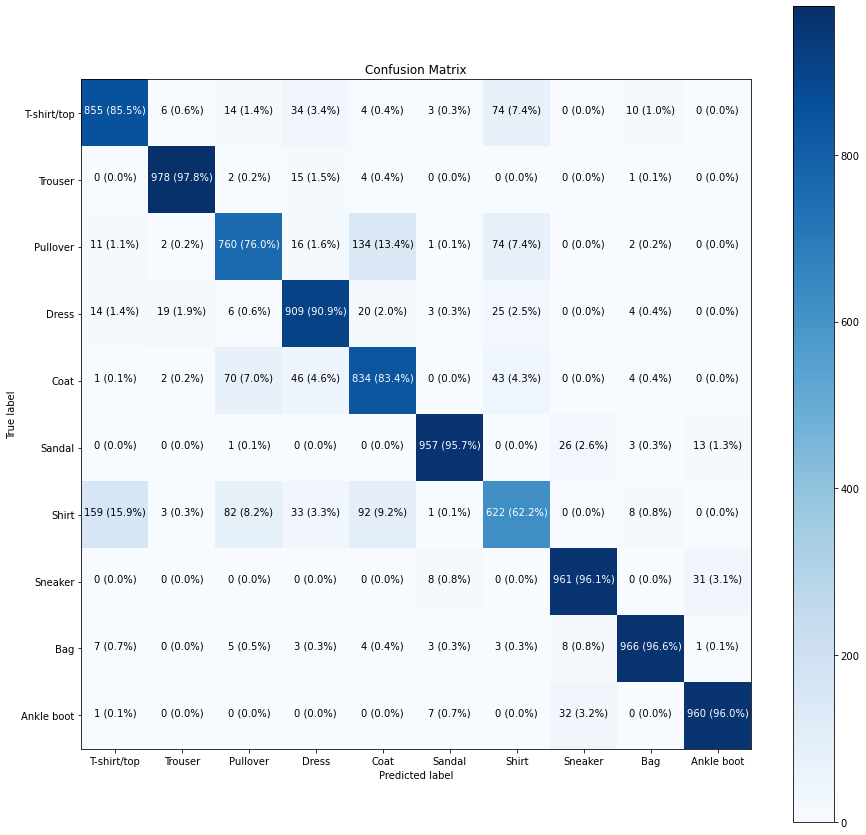

In [218]:
make_confusion_matrix(test_labels, y_preds,
                      classes=label_names,
                      figsize=(15, 15), 
                      text_size=10)


In [220]:
#visualise ground truth and predicted labels
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

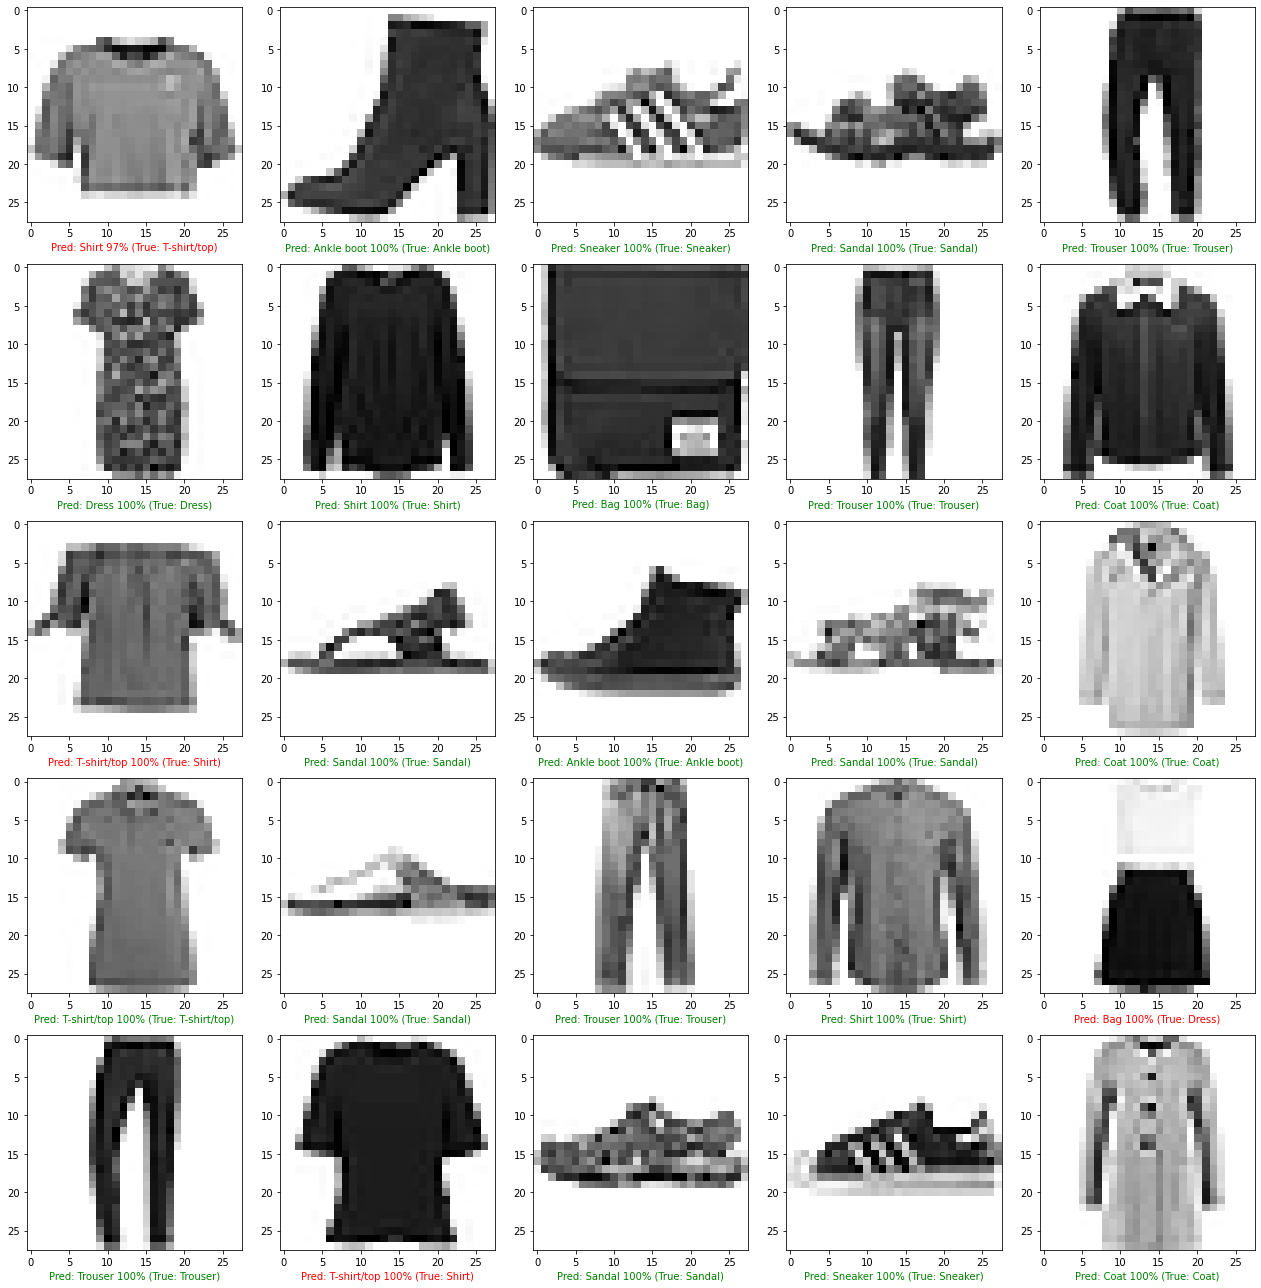

In [221]:
import random

plt.figure(figsize=(18,18))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    rand_index = random.choice(range(len(test_data)))
    plot_random_image(model_2_ideal, images=test_data, true_labels=test_labels, classes = label_names)
    plt.tight_layout()

